In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("USA_Housing.csv")
df.sample(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
3548,84123.990896,6.074466,6.571698,4.04,33946.371805,1.459835e+06,1141 Murphy Lane Suite 361\nNorth Kristenmouth...
3482,67128.934720,8.339254,4.621620,4.17,48165.644986,1.524124e+06,"216 Reyes Plaza\nLake Robertstad, TX 63527-1930"
1469,69380.837769,6.185506,6.115470,4.16,25327.686696,1.023965e+06,"5119 Hess Circles\nGouldview, FM 26660"
1914,46361.583274,4.406831,7.959983,6.33,37548.264902,4.834585e+05,"79100 Rivera Loaf\nLiustad, OR 71668"
734,76870.356285,5.359764,5.892954,4.32,25655.867123,1.039915e+06,60046 Destiny Port Suite 618\nNorth Nataliehav...
3688,78929.781546,6.231375,7.203153,6.18,39667.863192,1.503327e+06,"25024 John Way Suite 839\nRodriguezchester, NJ..."
1358,71227.388815,6.996436,8.006614,4.21,20096.291417,1.455692e+06,"10454 Gonzales Summit Apt. 065\nChambersstad, ..."
906,70472.792378,6.010154,6.110192,3.24,34894.158826,1.265181e+06,"4821 Christopher Park\nLopezside, MH 21430"
3277,63631.404131,6.083100,7.334558,6.05,33108.115145,1.296611e+06,"4374 Lang Vista\nLucasborough, MO 50846"
2908,64861.913380,6.402507,8.079373,5.31,25032.136518,1.240504e+06,"950 Ellison Haven Suite 426\nPort Annaburgh, I..."


In [4]:
df.shape

(5000, 7)

In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [9]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

### There are No any Null values

In [34]:
df.duplicated().sum()

0

### There are no Duplicated values in dataset

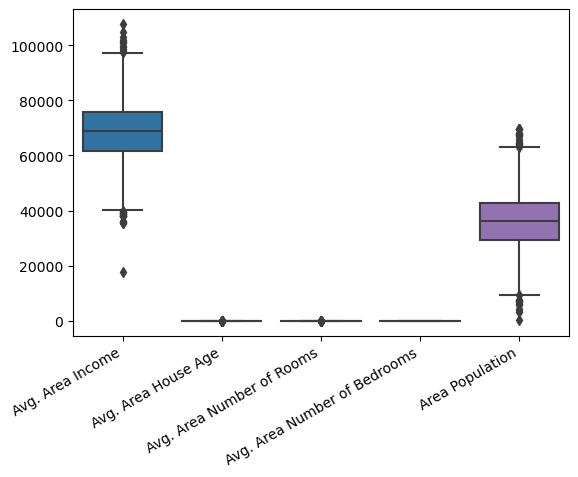

In [88]:
fig = plt.figure()
sns.boxplot(df.drop(columns=['Price']))
fig.autofmt_xdate()

In [90]:
df_o = df.clip(df.drop(columns=['Price']).quantile(0.1), df.drop(columns=['Price']).quantile(0.9), axis=1)

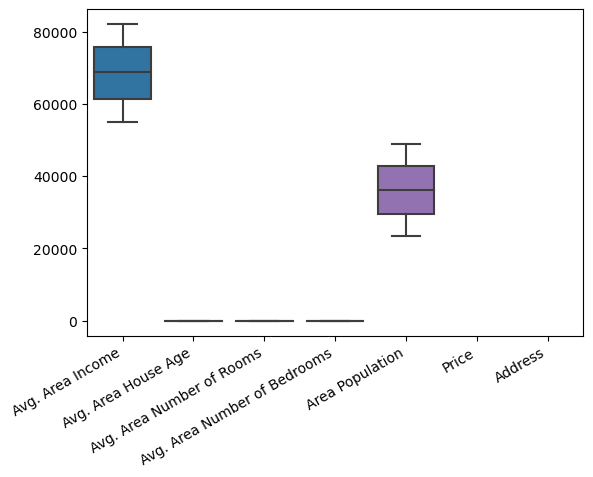

In [91]:
fig = plt.figure()
sns.boxplot(df_o)
fig.autofmt_xdate()

In [92]:
df_o.shape

(5000, 7)

### Here, clip function replaced all outlier to mean

In [ ]:
df_o.drop(columns=['Price', 'Address'], inplace=True)

### Standardization Formula

Z-Score = (Current_value – Mean) / Standard Deviation

In [105]:
df_o

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23502.845262
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.274222,5.13,36882.159400
3,63345.240046,7.188236,5.681951,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.243978,6.137356,3.46,23502.845262
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.243978,5.681951,2.31,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [152]:
z_score_data = (df_o - np.mean(df_o)) / (np.std(df_o))
z_score_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.257355,-0.359206,0.024099,0.095848,-1.546480
1,1.223251,0.032077,-0.309755,-0.756286,0.496518
2,-0.840522,-0.135433,1.541294,0.982068,0.093205
3,-0.604039,1.481287,-1.567697,-0.611423,-0.221993
4,-0.990450,-1.144500,1.019784,0.215147,-1.197047
...,...,...,...,...,...
4995,-0.923148,1.549438,-1.021516,-0.440997,-1.546480
4996,1.136230,1.250089,-0.494522,0.036199,-1.287491
4997,-0.598817,1.549438,-1.567697,-1.420951,-0.349951
4998,-0.069057,-0.540731,0.169165,1.246230,0.797087


In [142]:
np.mean(z_score_data)

Avg. Area Income                9.041656e-17
Avg. Area House Age             4.192202e-16
Avg. Area Number of Rooms       1.989520e-16
Avg. Area Number of Bedrooms    2.202682e-16
Area Population                -1.790568e-16
dtype: float64

### Using libarry standariszation

In [165]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df_o)

# Transform the data using the fitted scaler
standardized_data = scaler.transform(df_o)
standardized_data_df = pd.DataFrame(standardized_data)
standardized_data_df.max()

0    1.548709
1    1.549438
2    1.541294
3    1.808638
4    1.555449
dtype: float64

In [158]:
z_score_data.max()

Avg. Area Income                1.548709
Avg. Area House Age             1.549438
Avg. Area Number of Rooms       1.541294
Avg. Area Number of Bedrooms    1.808638
Area Population                 1.555449
dtype: float64

In [162]:
df_o.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,68602.354940,5.976663,6.989094,3.977520,36121.639189
std,8704.140895,0.818001,0.833881,1.173641,8160.504124
min,55047.633980,4.697755,5.681951,2.310000,23502.845262
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769
max,82081.188283,7.243978,8.274222,6.100000,48813.618633


### Normalize between 0 and 1: Use the formula zi = (xi – min(x)) / (max(x) – min(x)).
### Normalize between 0 and 100: Use the formula zi = (xi – min(x)) / (max(x) – min(x)) * 100.
### Put data within a custom range: Use the formula xnormalized = a + ( ((x - xminimum) * (b - a)) / range of x).
### Normalization factor: Use the formula Normalization = X - X minimum / X maximum - X minimum

In [121]:
norm_data = (df_o - df_o.min())/(df_o.max() - df_o.min())
norm_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,0.906201,0.386889,0.511998,0.469657,0.000000
1,0.895221,0.512581,0.404614,0.205805,0.658622
2,0.230803,0.458772,1.000000,0.744063,0.528602
3,0.306937,0.978108,0.000000,0.250660,0.426988
4,0.182535,0.134631,0.832258,0.506596,0.112650
...,...,...,...,...,...
4995,0.204202,1.000000,0.175678,0.303430,0.000000
4996,0.867205,0.903841,0.345184,0.451187,0.083493
4997,0.308618,1.000000,0.000000,0.000000,0.385737
4998,0.479171,0.328578,0.558658,0.825858,0.755519


<Axes: xlabel='Avg. Area Income', ylabel='Count'>

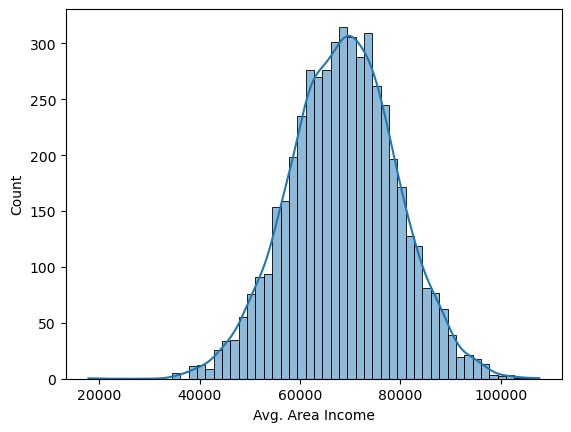

In [20]:
# fig = plt.figure(2,3)
sns.histplot(df['Avg. Area Income'], kde=True)

In [166]:
z_score_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.257355,-0.359206,0.024099,0.095848,-1.546480
1,1.223251,0.032077,-0.309755,-0.756286,0.496518
2,-0.840522,-0.135433,1.541294,0.982068,0.093205
3,-0.604039,1.481287,-1.567697,-0.611423,-0.221993
4,-0.990450,-1.144500,1.019784,0.215147,-1.197047
...,...,...,...,...,...
4995,-0.923148,1.549438,-1.021516,-0.440997,-1.546480
4996,1.136230,1.250089,-0.494522,0.036199,-1.287491
4997,-0.598817,1.549438,-1.567697,-1.420951,-0.349951
4998,-0.069057,-0.540731,0.169165,1.246230,0.797087


#### We should also scale the target variable price

In [186]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df[['Price']])

# Transform the data using the fitted scaler
z_score_data['Price'] = scaler.transform(df[['Price']])
z_score_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.257355,-0.359206,0.024099,0.095848,-1.546480,-0.490081
1,1.223251,0.032077,-0.309755,-0.756286,0.496518,0.775508
2,-0.840522,-0.135433,1.541294,0.982068,0.093205,-0.490211
3,-0.604039,1.481287,-1.567697,-0.611423,-0.221993,0.080843
4,-0.990450,-1.144500,1.019784,0.215147,-1.197047,-1.702518
...,...,...,...,...,...,...
4995,-0.923148,1.549438,-1.021516,-0.440997,-1.546480,-0.486795
4996,1.136230,1.250089,-0.494522,0.036199,-1.287491,0.709594
4997,-0.598817,1.549438,-1.567697,-1.420951,-0.349951,-0.570244
4998,-0.069057,-0.540731,0.169165,1.246230,0.797087,-0.094640


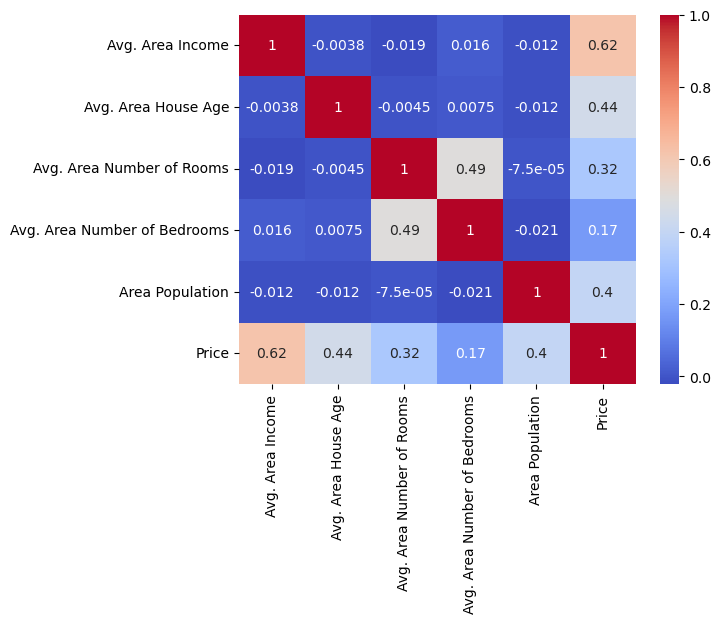

In [312]:
sns.heatmap(z_score_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [362]:
x = z_score_data[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Area Population']]
y = z_score_data[['Price']]

In [363]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=43)

In [364]:
from sklearn.linear_model import LinearRegression

In [365]:
model = LinearRegression()

In [366]:
model.fit(X_train, y_train)

LinearRegression()

In [367]:
y_pred = model.predict(X_test)

In [368]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [369]:
r2_score(y_test, y_pred)

0.8652194698738487

In [370]:
mean_absolute_error(y_test, y_pred)

0.289744597444624

In [371]:
mean_squared_error(y_test, y_pred)

0.13889863306031108